# Análisis exploratorio de Datos

Datos extraídos de https://volcano.si.edu


In [125]:
# importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import json

#seteado de parámetros:
%matplotlib inline 
#%matplotlib qt 
cwd = os.getcwd()

In [126]:
df = pd.read_excel(cwd + "\\GVP_Emission_Results.xlsx", header = 1)

In [127]:
# Agrego columnas con año mes y día para comparar con otros datasets

meses = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 
         'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}

df['YYYY'] = df.apply(lambda row: row[5][:4], axis=1)
df['MM'] = df.apply(lambda row: row[5][5:8], axis=1).map(meses)
df['DD'] = df.apply(lambda row: str(int(row[5][9:11])), axis=1)

print(df.shape)
df.head()

(206, 12)


,Volcano Number,Volcano Name,Country,Emission ID,Method,Start Date,End Date,Total SO2 Mass (kt),SO2 Altitude Range Start,YYYY,MM,DD
0,290360,Chikurachki,Russia,182,Satellite,2016 Mar 30,2016 Mar 30,4.0,6.8,2016,3,30
1,266030,Soputan,Indonesia,150,Satellite,2016 Jan 05,2016 Jan 05,3.0,11.8,2016,1,5
2,342090,Fuego,Guatemala,283,Satellite,2016 Jan 04,2016 Jan 20,2.0,7.0,2016,1,4
3,342090,Fuego,Guatemala,284,Satellite,2016 Feb 10,2016 Feb 10,1.0,7.0,2016,2,10
4,266030,Soputan,Indonesia,151,Satellite,2016 Feb 06,2016 Feb 06,5.0,7.0,2016,2,6


In [128]:
# Emisiones de SO2 por año
gdf = df.groupby(['YYYY']).sum('Total SO2 Mass (kt)').reset_index()
gdf

,YYYY,Volcano Number,Emission ID,Total SO2 Mass (kt),SO2 Altitude Range Start
0,1979,1066260,979,2885.00,34.0
1,1980,1577600,1124,1580.00,77.0
2,1981,284170,172,320.00,20.0
3,1982,1976490,1134,9836.00,74.9
4,1983,930030,600,206.50,25.4
5,1984,266030,132,166.00,16.0
6,1985,1540340,1077,782.00,77.1
7,1986,1214090,809,105.40,47.5
8,1987,223020,41,28.00,4.0
9,1988,533160,285,300.00,32.0


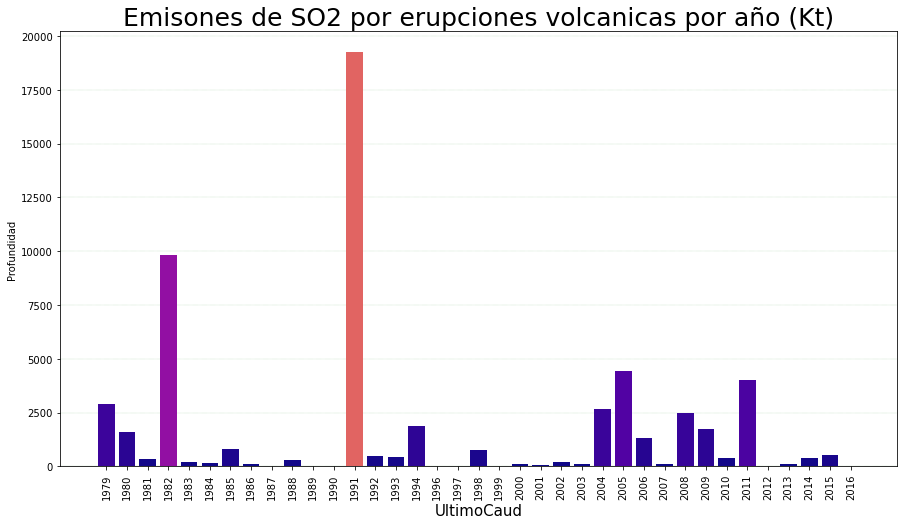

In [146]:
plt.rcParams["figure.figsize"] = (15,8)

x=gdf['YYYY']
y=gdf['Total SO2 Mass (kt)']

my_cmap = plt.get_cmap("plasma")
rescale = lambda y: ((y - np.min(y)) / (np.max(y) + np.min(y))*0.6)

#plt.bar(x, y, color=my_cmap(rescale(y)))


plt.bar(x, y, zorder=2, color=my_cmap(rescale(y)))
#plot = dfni.plot(kind='scatter', x=dfti[elemento[0]].to_list(), y= dfti[elemento[1]].to_list(),zorder=2, legend=None)
# Turn on the grid

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)

plt.grid(axis = 'y', linestyle='solid',zorder=0)
plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("Emisones de SO2 por erupciones volcanicas por año (Kt)",fontsize=25,fontweight=300)
plt.xlabel('UltimoCaud',fontsize=15,rotation=0)

#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel('Emiso')
plt.grid()



#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

1723